In [40]:
import numpy as np
import librosa as lr

import torch
import auraloss

from kymatio_audio import scattering_audio_distance as sad

from IPython import display as ipd
plt.rcParams['figure.figsize'] = [6, 3]

In [41]:
i, sr = lr.load('audio/speech/i.wav')
o, sr = lr.load('audio/speech/o.wav')
i = i/np.max(np.abs(i))
o = o/np.max(np.abs(o))

def power_log(x):
    return int(2**(np.ceil(np.log2(x))))

l = np.min([i.shape[0], o.shape[0]])
l = power_log(l)
i = lr.util.fix_length(i, size=l*2)
o = lr.util.fix_length(o, size=l*2)

In [42]:
noise_levels = 10

i_n = []
o_n = []
for n in range(noise_levels):
    i_t = i+np.log10((n+1)/(noise_levels))/2*np.random.randn(i.shape[0])
    i_t = i_t/np.linalg.norm(i_t)
    i_n.append(i_t)
    o_t = o+np.log10((n+1)/(noise_levels))/2*np.random.randn(o.shape[0])
    o_t = o_t/np.linalg.norm(o_t)
    o_n.append(o_t)

audio = i_n+o_n
a = np.hstack(audio)

import scipy.io.wavfile
scipy.io.wavfile.write('demo/noise.wav', sr, a)

ipd.Audio(a, rate=sr)

In [43]:
mss_distances = sad.multiscale_audio_distance(audio, sr)

Max num samples 32768
Max duration 1.486077097505669 seconds.


In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# from sklearn.manifold import TSNE
# emb = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3, metric='precomputed').fit_transform(distances)
# from sklearn.manifold import Isomap
# emb = Isomap(n_components=2, metric='precomputed').fit_transform(distances)

def plot_dist(distances, dist_type):

    emb = MDS(n_components=2, dissimilarity='precomputed', random_state=0).fit_transform(distances)
    h1 = plt.scatter(emb[:10, 0], emb[:10, 1], sizes=(np.arange(10)+1)*8, label='i')
    plt.plot(emb[:10, 0], emb[:10, 1], linewidth=.3)
    h2 = plt.scatter(emb[10:, 0], emb[10:, 1], sizes=(np.arange(10)+1)*8, label='o')
    plt.plot(emb[10:, 0], emb[10:, 1], linewidth=.3)
    plt.legend(handles=[h1, h2])
    plt.title(dist_type)
    plt.xticks([]),plt.yticks([])
    plt.savefig('demo/noise_'+dist_type+'.png')
    plt.show()
    

/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


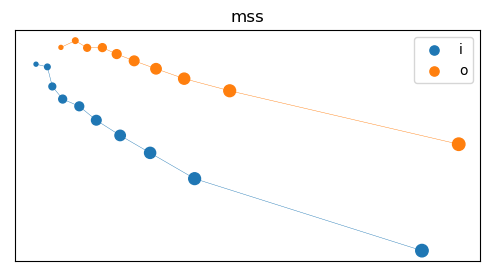

In [51]:
plot_dist(mss_distances, 'mss')

In [46]:
scattering_distances = sad.scattering_audio_distance(audio, sr)

Max num samples 32768
Max duration 1.486077097505669 seconds.
Time support: 1.486077097505669 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


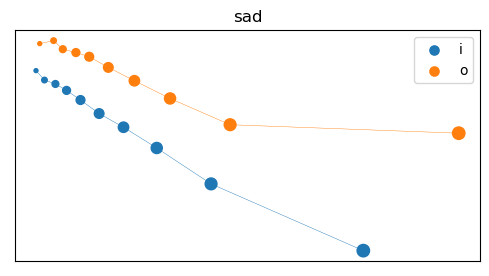

In [50]:

plot_dist(scattering_distances, 'sad')